In [1]:
#Import_libraries
import numpy as np
import tensorflow as tf
from keras.models import Model
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Input ,Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt



In [2]:
IMAGE_SIZE = (224, 224)
batch_size = 20

In [3]:
# Load the pre-trained DenseNet121 model without the top (classification) layer
densenet = DenseNet121(weights='imagenet', include_top=False,input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

In [4]:
for layer in densenet.layers:
    layer.trainable = False

In [5]:
# Training Images Preprocessing
train_datagen  = ImageDataGenerator(    
rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)   
training_set = train_datagen.flow_from_directory(
'train',target_size=IMAGE_SIZE,batch_size=batch_size,class_mode='categorical')


# Validation Images Preprocessing
val_datagen = ImageDataGenerator(
rescale=1./255)
val_set = val_datagen.flow_from_directory(
'val',target_size=IMAGE_SIZE,batch_size=batch_size,class_mode='categorical')


# Test Image Preprocessing
test_datagen = ImageDataGenerator(
rescale=1./255)
test_set = test_datagen.flow_from_directory(
'test',target_size=IMAGE_SIZE,batch_size=batch_size,class_mode='categorical')

Found 1000 images belonging to 5 classes.
Found 125 images belonging to 5 classes.
Found 125 images belonging to 5 classes.


In [6]:
x = Flatten()(densenet.output)
x = Dropout(0.5)(x)
prediction = Dense(5 , activation='softmax')(x)
model = Model(inputs=densenet.input , outputs=prediction)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,288,389 (27.80 MB)

 Trainable params: 250,885 (980.02 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [7]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  
    patience=3,           
    restore_best_weights=True)  

In [8]:
# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=training_set,validation_data=val_set,epochs=20 , callbacks=[early_stopping]) 

Epoch 1/20


C:\Users\Revotec\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.4625 - loss: 1.5849 - val_accuracy: 0.8400 - val_loss: 0.5162
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.8379 - loss: 0.4774 - val_accuracy: 0.8640 - val_loss: 0.4165
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.8981 - loss: 0.2870 - val_accuracy: 0.9360 - val_loss: 0.2567
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.9050 - loss: 0.2358 - val_accuracy: 0.9280 - val_loss: 0.2426
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.9359 - loss: 0.1779 - val_accuracy: 0.9360 - val_loss: 0.2207
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.9306 - loss: 0.1703 - val_accuracy: 0.9520 - val_loss: 0.1868
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.9389 - loss: 0.1715 - val_accuracy: 0.9600 - val_loss: 0.1653
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.9579 - loss: 0.1049 - val_accuracy: 0.9440 - val_loss: 0.

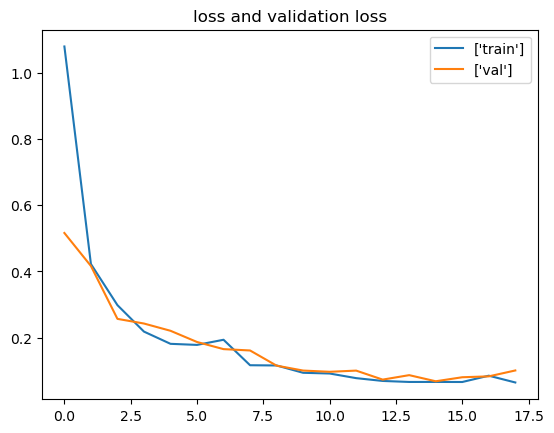

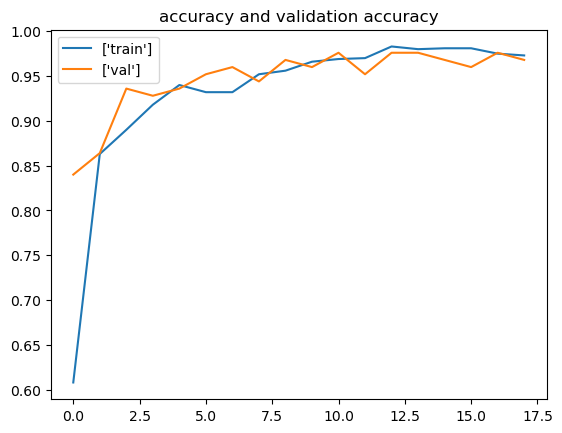

In [9]:
plt.plot(history.history['loss'], label=['train']) #loss de train
plt.plot(history.history['val_loss'], label=['val']) # loss de test
plt.title('loss and validation loss') # title
plt.legend()
plt.show()


plt.plot(history.history['accuracy'], label=['train']) #loss de train
plt.plot(history.history['val_accuracy'], label=['val']) # loss de test
plt.title('accuracy and validation accuracy') # title
plt.legend()
plt.show()

In [10]:
test_loss, test_acc = model.evaluate(test_set)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9889 - loss: 0.0377
Test Loss: 0.026417970657348633
Test Accuracy: 0.9919999837875366


In [13]:
model.save('DenseNet_121_DATASET1_CNN.h5')